<a href="https://colab.research.google.com/github/KonstantinosNikolakakis/Tensorflow-Classification/blob/master/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

Bunch object: acts like a dictionary

In [11]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
data.data.shape

(569, 30)

In [13]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [40]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [46]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 12ms/step - loss: 0.7381 - accuracy: 0.5328 - val_loss: 0.6709 - val_accuracy: 0.6064
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6247 - val_loss: 0.6079 - val_accuracy: 0.6755
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.6745 - val_loss: 0.5549 - val_accuracy: 0.7500
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7139 - val_loss: 0.5129 - val_accuracy: 0.7553
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.7585 - val_loss: 0.4763 - val_accuracy: 0.7872
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8058 - val_loss: 0.4455 - val_accuracy: 0.8138
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8478 - val_loss: 0.4190 - val_accuracy: 0.8404
Epoch 8/100


In [49]:
print("Train score:", model.evaluate(X_train,Y_train))
print("Test score:", model.evaluate(X_test,Y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9843
Train score: [0.08292967081069946, 0.9842519760131836]
6/6 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.9734
Test score: [0.11773408949375153, 0.9734042286872864]


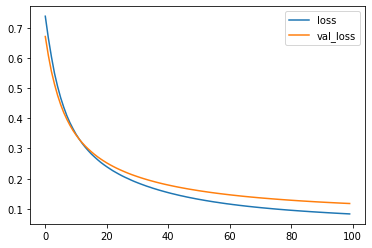

In [53]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss') #training loss stored in key loss
plt.plot(r.history['val_loss'], label='val_loss') #validation loss stored in key val_loss
plt.legend()

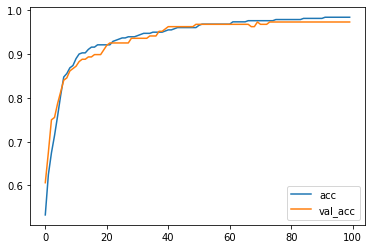

In [54]:
plt.plot(r.history['accuracy'],label='acc') #training accuracy stored in key accuracy
plt.plot(r.history['val_accuracy'], label='val_acc') #validation accuracy stored in key val_accuracy
plt.legend()